In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import cv2

In [2]:
data = os.listdir(r"D:\BRAIN project\Testing\Training")
classes = {"Yes" : 1, "no_tumor" : 0}

In [3]:
data

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor', 'Yes']

In [4]:
classes

{'Yes': 1, 'no_tumor': 0}

In [5]:
x = []
y = []
for cls in classes:
    path = r"D:/BRAIN project/Testing/Training/"+cls
    for j in os.listdir(path):
        img = cv2.imread(path+"/"+j, 0)
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])

KeyboardInterrupt: 

In [58]:
np.unique(y)

array([0, 1])

In [59]:
x = np.array(x)
y = np.array(y)

Data Visualisation

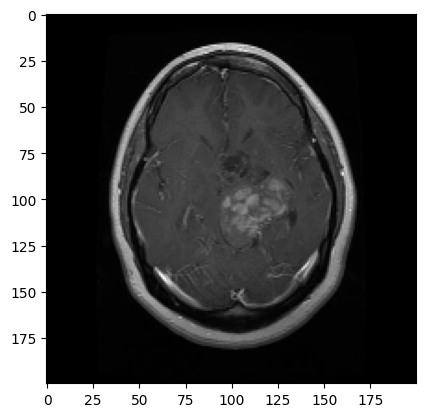

In [60]:
plt.imshow(x[0], cmap = "gray")
plt.show()

Data Prepration 

In [61]:
pd.Series(y).value_counts()

1    2475
0     395
Name: count, dtype: int64

In [62]:
x.shape

(2870, 200, 200)

In [63]:
updated_x = x.reshape(len(x), -1)
updated_x.shape

(2870, 40000)

In [64]:
updated_x[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(40000,), dtype=uint8)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(updated_x, y, test_size=0.2, random_state=10)

In [67]:
X_train.shape, y_train.shape

((2296, 40000), (2296,))

In [68]:
X_test.shape, y_test.shape

((574, 40000), (574,))

In [69]:
X_train = X_train/255
X_test = x_test/255

In [70]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(2296, 40000))

In [71]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.03137255, 0.03137255,
        0.02745098],
       [0.23921569, 0.1254902 , 0.12941176, ..., 0.00784314, 0.00392157,
        0.11764706],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(574, 40000))

In [72]:
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
model_name = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

Logistic Regression = 0.9285714285714286


c:\Users\yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


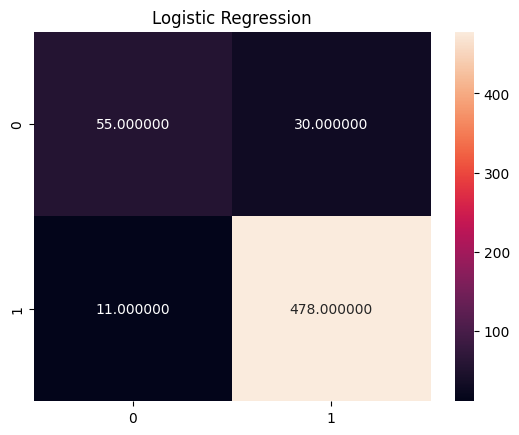

Random Forest = 0.9512195121951219


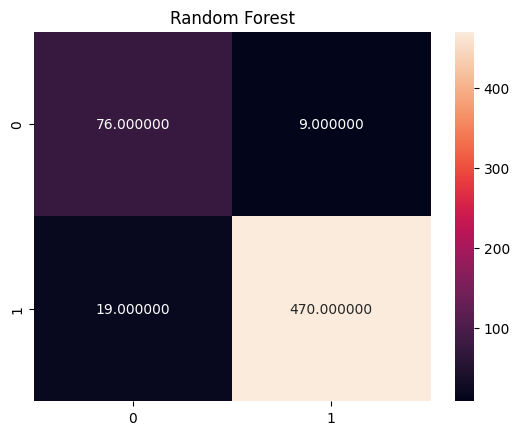

Decision Tree = 0.9337979094076655


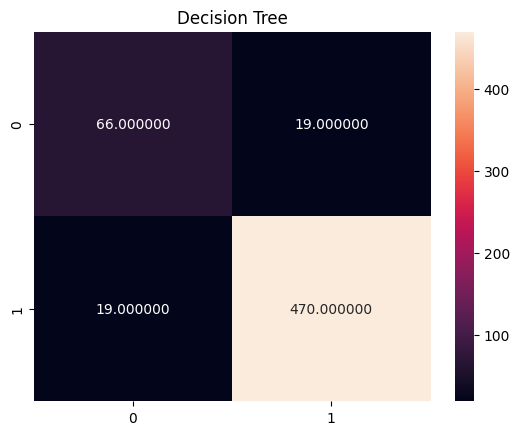

SVM = 0.9181184668989547


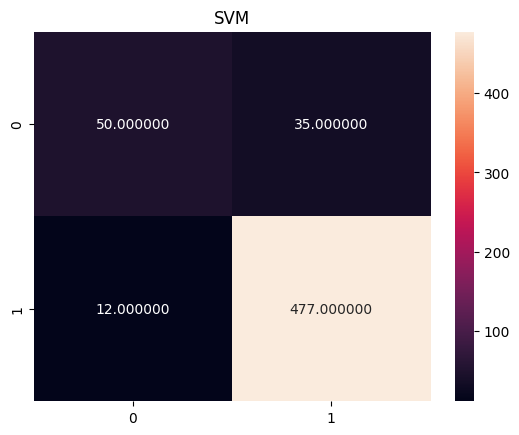

In [25]:
for model_names, model in model_name.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_names} = {accuracy_score(y_test, y_pred)}")
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt = "2f")
    plt.title(f"{model_names}")
    plt.show()

In [74]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
print(f"Training Accuracy{random_forest_model.score(X_train, y_train)}")
print(f"Training Accuracy{random_forest_model.score(X_test, y_test)}")

Training Accuracy1.0
Training Accuracy0.9547038327526133


In [76]:
import joblib

In [77]:
joblib.dump(random_forest_model, "Brain_Tumor_Model.joblib")

['Brain_Tumor_Model.joblib']

In [78]:
desc = {1: "Positive_tumor",0: "No_Tumor"}

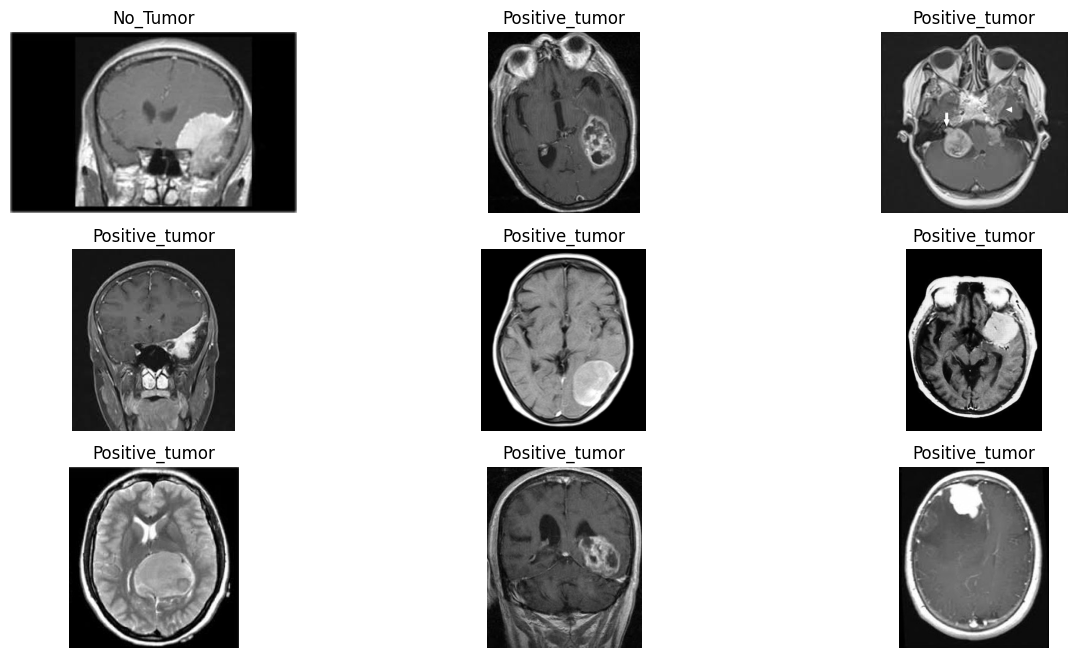

In [87]:
new_img =  os.listdir("D:/BRAIN project/Testing/Training")
plt.figure(figsize=(15, 8))
c = 1
for i in os.listdir("D:/BRAIN project/Testing/Testing/meningioma_tumor/")[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread("D:/BRAIN project/Testing/Testing/meningioma_tumor/"+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = random_forest_model.predict(img1)
    
    plt.title(desc[p[0]])
    plt.imshow(img, cmap="grey")
    plt.axis("off")
    c+=1